In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from src import image_metrics, io_utils, image_utils
from src.Tile import Tile

# Filtering by multitile-ness

I am going to assume that individual tile is contrasting and symmetric. In this notebook I will attempt to select images that consist of multiple different tiles.

As before, I am going to work on cropped images.

In [4]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/hand painted tile',
    'dataset/bing/handmade tile',
    'dataset/bing/portuguese tile'
]

In [5]:
from skimage.metrics import structural_similarity as ssim, normalized_root_mse

def similarity_mse_based(x, y): return 1 - normalized_root_mse(x, y)
def similarity_ssim_based(x, y): return ssim(x, y, multichannel=True)

metrics = [similarity_mse_based, similarity_ssim_based]

In [29]:
def tile_multitileness(tile, pieces, metric, agg, similarity_check_sample=100, **kwargs):
    tile_list = tile.get_pieces(pieces)
    symmetries = [None] * pieces
    for i, tile_piece in enumerate(tile_list):
        symmetries[i] = image_metrics.tile_symmetry(tile_piece, metric, agg, **kwargs)
    
    similarities = [None] * similarity_check_sample
    for i in range(similarity_check_sample):
        j, k = np.random.choice(range(pieces), 2, replace=False)
        similarities[i] = metric(tile_list[j].img, tile_list[k].img, **kwargs)
    
    return {'symmetry': np.median(symmetries), 'similarity': np.median(similarities)}

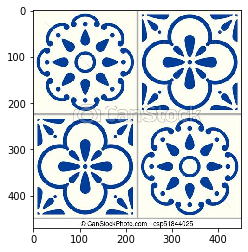

In [135]:
folder = folder_list[0]
img_file = '000062.jpg'
img = cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]
plt.imshow(img)

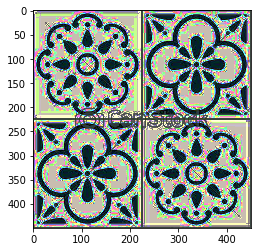

In [139]:
plt.imshow(prepare(img))

In [140]:
tile_multitileness(Tile(prepare(img)),4, similarity_ssim_based, min)

{'symmetry': 0.37572457112866675, 'similarity': 0.1139076579888409}

In [138]:
plot_sample = 12
cut_off = 0.4

def prepare(img): return image_utils.prepare(
    img, 
    apply_contrast=True, 
    apply_blur=False
)

# for folder in folder_list:
#     print('Working on {} folder.'.format(folder))
#     files = [_.strip() for _ in open('lists/contrasting_{}.txt'.format(folder.replace('/', '-')), 'r').readlines()]
    
#     imgs = [prepare(img) for img in io_utils.read_imgs(files, folder)]
#     tiles = [Tile(img) for img in imgs]
#     symmetries = [max([image_metrics.tile_symmetry(tile, metric, min) for metric in metrics]) for tile in tiles]
    
#     print('Symmetries of the images')
#     io_utils.plot_metric(symmetries, cut_off)
    
#     files_symmetric = [_[0] for _ in zip(files, symmetries) if _[1] >= cut_off]
#     imgs_symmetric = [prepare(img) for img in io_utils.read_imgs(files_symmetric, folder)]
    
#     files_other = [_ for _ in files if _ not in files_symmetric]
#     imgs_other = [prepare(img) for img in io_utils.read_imgs(files_other, folder)]
    
#     print('Random sample of not symmetric files:')
#     io_utils.plot_sample_imgs(imgs_other, plot_sample=plot_sample)
    
#     print('Random sample of symmetric files:')
#     io_utils.plot_sample_imgs(imgs_symmetric, plot_sample=plot_sample)
    
#     print('Total files: {}, out of them symmetric: {}.'.format(len(files), len(files_symmetric)))
    
#     with open('lists/symmetric{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
#         for filename in files_symmetric:
#             filehandle.write('%s\n' % filename)
            
#     print('\n\n')